In [2]:
import sqlite3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
from collections import defaultdict
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

In [2]:
# Connect to the SQLite database (since it's in the same folder, you can just use the filename)
db_path = 'metadata-110mil.sqlite'
conn = sqlite3.connect(db_path)

# Check available tables in the database (optional)
tables = pd.read_sql_query("SELECT name FROM sqlite_master WHERE type='table';", conn)
print("Available tables:", tables)

# Specify the table you want to load
table_name = 'metadata'  # Replace with your actual table name

# Load the table into a DataFrame
df = pd.read_sql_query(f"SELECT * FROM {table_name};", conn)

# Close the database connection
conn.close()

# Display the first few rows of the DataFrame
df.head()


Available tables:        name
0  metadata


,Path,Title,Author,Category,Genre,Language,Status,Published,Updated,Packaged,Rating,Chapters,Words,Publisher,Story URL,Author URL,Summary,word_count,chapter_count,story_id
0,Fanfiction/Halo_ Mass Effect/Completed/Halo_ M...,The Distant Strains of Triumph,SpartanDelta2,"Halo, Mass Effect","Drama, Sci-Fi",English,Completed,2013-07-15,2013-07-15,2013-10-28 09:08:08,M,1,"1,180",www.fanfiction.net,http://www.fanfiction.net/s/9493934/1/,http://www.fanfiction.net/u/2727455/SpartanDelta2,"A project for my class, a challenge from my te...",1180,1,9493934
1,Fanfiction/Halo_ Mass Effect/Completed/Halo_ M...,Mass Effect: Beyond,Cunningham-Hughes,"Halo, Mass Effect","Adventure, Sci-Fi",English,Completed,2012-10-01,2012-10-01,2013-07-21 09:44:53,T,1,"9,971",www.fanfiction.net,http://www.fanfiction.net/s/8573953/1/,http://www.fanfiction.net/u/4262625/Cunningham...,A hardcore Mass Effect fan's retelling of the ...,9971,1,8573953
2,Fanfiction/Halo_ Mass Effect/Completed/Halo_ M...,Chaos Infinitium,Sysero of Cain,"Halo, Mass Effect","Adventure, Sci-Fi",English,Completed,2011-03-11,2011-11-17,2014-11-23 22:48:57,T,5,"19,447",www.fanfiction.net,https://www.fanfiction.net/s/6816070/1/,https://www.fanfiction.net/u/2362265/Sysero-of...,First Contact never seems to go well. But thin...,19447,5,6816070
3,Fanfiction/Halo_ Mass Effect/Completed/Halo_ M...,Tools of Defiance,Magisking,"Halo, Mass Effect","Angst, Tragedy",English,Completed,2013-12-22,2013-12-22,2014-02-07 23:48:12,T,1,997,www.fanfiction.net,https://www.fanfiction.net/s/9946669/1/,https://www.fanfiction.net/u/5244687/Magisking,A One-shot that takes place in the Defiance un...,997,1,9946669
4,Fanfiction/Halo_ Mass Effect/Completed/Halo_ M...,Mass Effect New Origins V2,erttheking,"Halo, Mass Effect","Romance, Sci-Fi",English,Completed,2010-10-05,2012-06-09,2014-05-25 15:31:13,T,109,"442,687",www.fanfiction.net,https://www.fanfiction.net/s/6376514/1/,https://www.fanfiction.net/u/1835782/erttheking,"On the dawn of the 27th century, the UNSC disc...",442687,109,6376514


In [3]:
test = df.iloc[0]
print(test)

Path             Fanfiction/Halo_ Mass Effect/Completed/Halo_ M...
Title                               The Distant Strains of Triumph
Author                                               SpartanDelta2
Category                                         Halo, Mass Effect
Genre                                                Drama, Sci-Fi
Language                                                   English
Status                                                   Completed
Published                                               2013-07-15
Updated                                                 2013-07-15
Packaged                                       2013-10-28 09:08:08
Rating                                                           M
Chapters                                                         1
Words                                                        1,180
Publisher                                       www.fanfiction.net
Story URL                   http://www.fanfiction.net/s/949393

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams

# Set the font to a universal one like Noto Sans
#rcParams['font.sans-serif'] = ['Noto Sans', 'DejaVu Sans', 'Arial Unicode MS']  # Ensure Noto Sans is installed
#rcParams['axes.unicode_minus'] = False  # Avoid issues with minus signs

# Load your data (assuming it's already in a DataFrame `df`)
# df = pd.read_csv('your_file.csv')  # Uncomment this if you're loading from a CSV file

# Split categories by commas and stack them to get a single column of all categories
#all_categories = df['Category'].str.split(',').explode()

# Strip any extra whitespace from each category (important if there are spaces after commas)
#all_categories = all_categories.str.strip()

# Count occurrences of each unique category
#category_counts = all_categories.value_counts()

# Filter categories to include only those with at least 500 occurrences
#filtered_category_counts = category_counts[category_counts >= 10000]

# Plot as a bar chart
#plt.figure(figsize=(20, 6))
#filtered_category_counts.plot(kind='bar', color='skyblue')
#plt.title('Distribution of Categories (at least 10000 entries)')
#plt.xlabel('Category')
#plt.ylabel('Count')
#plt.xticks(rotation=90, ha='right')
#plt.tight_layout()
#plt.show()


![category_distribution](category_distribution.png)

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Take a random sample of 100,000 rows (adjust the number as needed for performance)
#sample_df = df['word_count'].sample(100000, random_state=42)

#plt.figure(figsize=(10, 6))
#sns.histplot(sample_df, bins=50, kde=True)

#plt.xlabel("Word Count")
#plt.ylabel("Frequency")
#plt.title("Distribution of Word Count (Sampled)")

#plt.show()


![word distribution](word_distribution.png)

<h2> Cleaning and Formating Data: </h2>

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6704321 entries, 0 to 6704320
Data columns (total 20 columns):
 #   Column         Dtype 
---  ------         ----- 
 0   Path           object
 1   Title          object
 2   Author         object
 3   Category       object
 4   Genre          object
 5   Language       object
 6   Status         object
 7   Published      object
 8   Updated        object
 9   Packaged       object
 10  Rating         object
 11  Chapters       object
 12  Words          object
 13  Publisher      object
 14  Story URL      object
 15  Author URL     object
 16  Summary        object
 17  word_count     object
 18  chapter_count  object
 19  story_id       object
dtypes: object(20)
memory usage: 1023.0+ MB


In [10]:
missing_all_values = df[df["Publisher"] == ""].value_counts()#.index.tolist()
len(missing_all_values) # TODO: Clean all that are missing. 79 missing is rows that dont hae any value beside path

79

In [11]:
rows_with_null = (df.isnull()).sum()
rows_with_null

Path             0
Title            0
Author           0
Category         0
Genre            0
Language         0
Status           0
Published        0
Updated          0
Packaged         0
Rating           0
Chapters         0
Words            0
Publisher        0
Story URL        0
Author URL       0
Summary          0
word_count       0
chapter_count    0
story_id         0
dtype: int64

In [12]:
rows_with_missing_values = (df.isnull() | (df == "")).any(axis=1).sum()
rows_with_missing_values

652658

In [13]:
rows_with_missing_values / len(df) * 100

9.734885904180304

In [14]:
all_missing = (df == "").sum()
all_missing

Path                  0
Title               142
Author               83
Category            120
Genre            652471
Language             79
Status               79
Published            81
Updated              81
Packaged             81
Rating               79
Chapters             79
Words                79
Publisher            79
Story URL            79
Author URL           79
Summary             210
word_count           79
chapter_count        79
story_id             79
dtype: int64

In [4]:
# Changing data type for chapter and word count into int type

df['word_count'] = pd.to_numeric(df['word_count'], errors='coerce').astype('Int64')
df['chapter_count'] = pd.to_numeric(df['chapter_count'], errors='coerce').astype('Int64')

In [5]:
#df_usable = df.copy(deep=True) 

# Remove redundant  and unimportant columns

df_usable = df.drop(columns=['Chapters', 'Words','Path','Story URL','Author URL'])

# remove rows where all values are missing (79 of those)

df_usable = df_usable[df_usable['word_count'] != '']

# All where summary, genre and category is missing

df_usable = df_usable[df_usable['Summary'] != '']
df_usable = df_usable[df_usable['Category'] != '']
df_usable = df_usable[df_usable['Genre'] != '']

# Removing extreme word count values  (100 < x < 2,000,000)

df_usable = df_usable[(df_usable['word_count'] > 100) & (df_usable['word_count'] < 2000000)]


In [6]:
df_usable = df_usable.drop(columns=['Packaged', 'Publisher'])

In [7]:
df_usable = df_usable.drop(columns=['Status', 'Published', 'Updated', 'Rating', 'story_id'])


In [8]:
df_usable=df_usable[(df_usable['Language'] == 'English')]

In [9]:
df_usable = df_usable.drop(columns=['Language'])

In [27]:
df_usable = df_usable.drop(columns=['word_count','chapter_count','Author'])

In [10]:
category_counts = df_usable["Category"].value_counts()

# Find categories with more than 1000 occurrences
categories_to_keep = category_counts[category_counts > 1000].index

# Filter the DataFrame
df_usable = df_usable[df_usable["Category"].isin(categories_to_keep)]

len(df_usable)

4599826

In [25]:
# Counting after cleaning all the missing
missing = (df_usable == "").sum()
missing

Title            27
Author            2
Category          0
Genre             0
Summary           0
word_count        0
chapter_count     0
dtype: Int64

In [29]:
df_usable.columns

Index(['Title', 'Category', 'Genre', 'Summary'], dtype='object')

In [31]:
len(df_usable)

4599826

In [43]:
# Count occurrences of each genre and category
genre_counts = df_usable['Genre'].value_counts()
category_counts = df_usable['Category'].value_counts()

# Filter out rare genres and categories (with less than 2 samples)
min_samples = 2
df_usable = df_usable[
    df_usable['Genre'].isin(genre_counts[genre_counts >= min_samples].index) &
    df_usable['Category'].isin(category_counts[category_counts >= min_samples].index)
]

In [83]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, accuracy_score
from skmultilearn.model_selection import iterative_train_test_split
from sklearn.preprocessing import MultiLabelBinarizer

import lightgbm as lgb

In [11]:
df_usable['Genre_List'] = df_usable['Genre'].str.split(', ')

AttributeError: 'Series' object has no attribute 'split'

In [13]:
df_usable

,Title,Category,Genre,Summary,combined_text,Genre_List
0,Wasted Time,Tomb Raider,"Friendship, Romance",One shot of Sam and Lara in University. Lara d...,Wasted Time One shot of Sam and Lara in Univer...,"['Friendship', 'Romance']"
1,Tomb Raider: Let the Rain Fall,Tomb Raider,Drama,Short Story; Lara gets a call from an old frie...,Tomb Raider: Let the Rain Fall Short Story; La...,['Drama']
2,Yes,Tomb Raider,"Friendship, Romance","After Alex's death, Lara ponders over her own ...","Yes After Alex's death, Lara ponders over her ...","['Friendship', 'Romance']"
3,The mask of Tak,Tomb Raider,"Adventure, Romance",1991: Lara goes to a lonely island to find the...,The mask of Tak 1991: Lara goes to a lonely is...,"['Adventure', 'Romance']"
4,From Death Comes Life,Tomb Raider,"Family, Hurt-Comfort","Lara has always been a people pleaser, but to ...",From Death Comes Life Lara has always been a p...,"['Family', 'Hurt-Comfort']"
...,...,...,...,...,...,...
4599820,What Once Was Mine,Tangled,"Adventure, Drama",Before Rapunzel and Eugene Fitzherbert came al...,What Once Was Mine Before Rapunzel and Eugene ...,"['Adventure', 'Drama']"
4599821,Rapunzel's Rebellion,Tangled,"Adventure, Family","Gothel never kidnapped Rapunzel, but life as C...",Rapunzel's Rebellion Gothel never kidnapped Ra...,"['Adventure', 'Family']"
4599822,Michaela Ever After,Tangled,"Adventure, Romance","When Michaela's musical powers are discovered,...",Michaela Ever After When Michaela's musical po...,"['Adventure', 'Romance']"
4599823,Tangled Up in Ficlets,Tangled,"Humor, Romance","An ongoing collection of drabbles and ficlets,...",Tangled Up in Ficlets An ongoing collection of...,"['Humor', 'Romance']"


In [ ]:
df_usable['combined_text'] = df_usable['Title'] + ' ' + df_usable['Summary']

In [85]:
# Vectorize the text data using TF-IDF
vectorizer = TfidfVectorizer(max_features=5000, ngram_range=(1, 2))  # Adjust max_features for memory efficiency
X = vectorizer.fit_transform(df_usable['combined_text'])

# MultiLabel Binarizer to convert genres into binary columns
mlb = MultiLabelBinarizer()
y_genres = mlb.fit_transform(df_usable['Genre_List'])  # Multi-label binary format

# Split data into training and testing sets
X_train, X_test, y_genres_train, y_genres_test = iterative_train_test_split(
    X, y_genres, test_size=0.2
)

KeyboardInterrupt: 

In [27]:
unique_words_df

,Category,Genre,Unique_Words
0,.hack/SIGN,Adventure,"[diannah, told, suck, post, planning, phobos, ..."
1,.hack/SIGN,"Adventure, Angst","[mimiru, downward, plan, visit, lain, position..."
2,.hack/SIGN,"Adventure, Drama","[kitexblackrose, wavemasters, eventmade, invol..."
3,.hack/SIGN,"Adventure, Family","[centric, balmung, sky, timline, edited, said,..."
4,.hack/SIGN,"Adventure, Fantasy","[suck, charter, unravel, game, red, actionmyst..."
...,...,...,...
69989,xxxHOLiC,Supernatural,"[interesting, note, figured, say, walking, vis..."
69990,xxxHOLiC,"Supernatural, Suspense","[vague, dellestinto, affect, notexxxholic, lig..."
69991,xxxHOLiC,"Supernatural, Tragedy","[chapter, pie, need, said, wait, wished, darkn..."
69992,xxxHOLiC,Suspense,"[little, doumekis, dream, lead, blur, unusual,..."


In [28]:
unique_words_df[unique_words_df["Unique_Words"].apply(len) == 0]

,Category,Genre,Unique_Words
36275,Marching Band,"Angst, Mystery",[]


In [13]:
df_usable.shape
# Specify the output file
output_file = "filtered_usable_df.csv"

# Save to CSV
df_usable.to_csv(output_file, sep=";", encoding="utf-8", index=False)  # Set index=False to avoid saving the index

print(f"DataFrame successfully written to {output_file}")

DataFrame successfully written to filtered_usable_df.csv


In [30]:
len(df_usable)

4599826

In [31]:
output_file = "unique_words_df.csv"

# Save to CSV
unique_words_df.to_csv(output_file, sep=";", encoding="utf-8", index=False)  # Set index=False to avoid saving the index

print(f"DataFrame successfully written to {output_file}")

DataFrame successfully written to unique_words_df.csv


<h2> Build a model </h2>

In [3]:
df_usable = pd.read_csv("filtered_usable_df.csv", sep=";")
print(df_usable.shape)

(4599825, 6)


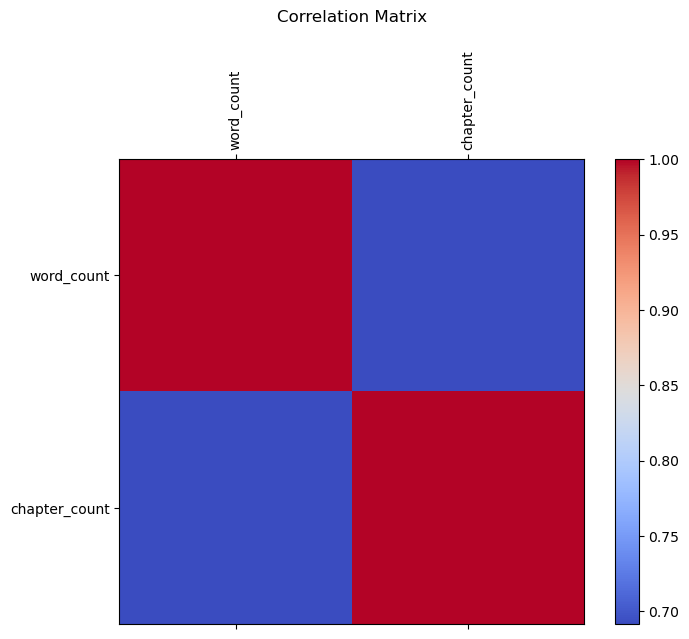

,word_count,chapter_count
word_count,1.000000,0.691608
chapter_count,0.691608,1.000000


In [37]:
numerical_columns = df[['word_count', 'chapter_count']].copy()

# Convert these columns to numeric (if needed)
numerical_columns = numerical_columns.apply(pd.to_numeric, errors='coerce')

# Drop any rows with NaN values in numerical columns to avoid calculation issues
numerical_columns = numerical_columns.dropna()

# Calculate the correlation matrix
correlation_matrix = numerical_columns.corr()

# Plot the correlation matrix
plt.figure(figsize=(8, 6))
plt.matshow(correlation_matrix, cmap='coolwarm', fignum=1)
plt.xticks(range(len(correlation_matrix.columns)), correlation_matrix.columns, rotation=90)
plt.yticks(range(len(correlation_matrix.columns)), correlation_matrix.columns)
plt.colorbar()
plt.title("Correlation Matrix", pad=20)
plt.show()

correlation_matrix

In [5]:
df_usable

,Title,Category,Genre,Summary,combined_text,Genre_List
0,Wasted Time,Tomb Raider,"Friendship, Romance",One shot of Sam and Lara in University. Lara d...,Wasted Time One shot of Sam and Lara in Univer...,"['Friendship', 'Romance']"
1,Tomb Raider: Let the Rain Fall,Tomb Raider,Drama,Short Story; Lara gets a call from an old frie...,Tomb Raider: Let the Rain Fall Short Story; La...,['Drama']
2,Yes,Tomb Raider,"Friendship, Romance","After Alex's death, Lara ponders over her own ...","Yes After Alex's death, Lara ponders over her ...","['Friendship', 'Romance']"
3,The mask of Tak,Tomb Raider,"Adventure, Romance",1991: Lara goes to a lonely island to find the...,The mask of Tak 1991: Lara goes to a lonely is...,"['Adventure', 'Romance']"
4,From Death Comes Life,Tomb Raider,"Family, Hurt-Comfort","Lara has always been a people pleaser, but to ...",From Death Comes Life Lara has always been a p...,"['Family', 'Hurt-Comfort']"
...,...,...,...,...,...,...
4599820,What Once Was Mine,Tangled,"Adventure, Drama",Before Rapunzel and Eugene Fitzherbert came al...,What Once Was Mine Before Rapunzel and Eugene ...,"['Adventure', 'Drama']"
4599821,Rapunzel's Rebellion,Tangled,"Adventure, Family","Gothel never kidnapped Rapunzel, but life as C...",Rapunzel's Rebellion Gothel never kidnapped Ra...,"['Adventure', 'Family']"
4599822,Michaela Ever After,Tangled,"Adventure, Romance","When Michaela's musical powers are discovered,...",Michaela Ever After When Michaela's musical po...,"['Adventure', 'Romance']"
4599823,Tangled Up in Ficlets,Tangled,"Humor, Romance","An ongoing collection of drabbles and ficlets,...",Tangled Up in Ficlets An ongoing collection of...,"['Humor', 'Romance']"


In [27]:
df_usable_2 = pd.read_csv("filtered_usable_2_df.csv", sep=";")
print(df_usable_2.shape)

(3930844, 6)


In [29]:
genre_dict = {}

In [30]:
for i in df_usable_2["Genre"]:
    list_genre = i.split(', ')
    for a in list_genre:
        if a in genre_dict:
            genre_dict[a] += 1
        else:
            genre_dict[a] = 1

genre_dict

{'Friendship': 352654,
 'Romance': 2175045,
 'Drama': 709988,
 'Adventure': 526442,
 'Family': 245946,
 'Hurt-Comfort': 422396,
 'Suspense': 79245,
 'Fantasy': 109784,
 'Sci-Fi': 66985,
 'Humor': 846949,
 'Angst': 544329,
 'Supernatural': 108757,
 'Tragedy': 157780,
 'Spiritual': 19189,
 'Poetry': 58951,
 'Parody': 73664,
 'Mystery': 83808,
 'Horror': 78081,
 'Crime': 27524,
 'Western': 2197}

In [8]:
genre_dict.keys()

dict_keys(['Friendship', 'Romance', 'Drama', 'Adventure', 'Family', 'Hurt-Comfort', 'Suspense', 'Fantasy', 'Sci-Fi', 'Humor', 'Angst', 'Supernatural', 'Tragedy', 'Spiritual', 'Poetry', 'Parody', 'Mystery', 'Horror', 'Crime', 'Western'])

In [9]:
for genre in genre_dict.keys():
    df_usable[genre] = df_usable['Genre'].apply(lambda x: 1 if genre in str(x).split(', ') else 0)

In [10]:
df_usable

,Title,Category,Genre,Summary,combined_text,Genre_List,Friendship,Romance,Drama,Adventure,...,Angst,Supernatural,Tragedy,Spiritual,Poetry,Parody,Mystery,Horror,Crime,Western
0,Wasted Time,Tomb Raider,"Friendship, Romance",One shot of Sam and Lara in University. Lara d...,Wasted Time One shot of Sam and Lara in Univer...,"['Friendship', 'Romance']",1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Tomb Raider: Let the Rain Fall,Tomb Raider,Drama,Short Story; Lara gets a call from an old frie...,Tomb Raider: Let the Rain Fall Short Story; La...,['Drama'],0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,Yes,Tomb Raider,"Friendship, Romance","After Alex's death, Lara ponders over her own ...","Yes After Alex's death, Lara ponders over her ...","['Friendship', 'Romance']",1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,The mask of Tak,Tomb Raider,"Adventure, Romance",1991: Lara goes to a lonely island to find the...,The mask of Tak 1991: Lara goes to a lonely is...,"['Adventure', 'Romance']",0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
4,From Death Comes Life,Tomb Raider,"Family, Hurt-Comfort","Lara has always been a people pleaser, but to ...",From Death Comes Life Lara has always been a p...,"['Family', 'Hurt-Comfort']",0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4599820,What Once Was Mine,Tangled,"Adventure, Drama",Before Rapunzel and Eugene Fitzherbert came al...,What Once Was Mine Before Rapunzel and Eugene ...,"['Adventure', 'Drama']",0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
4599821,Rapunzel's Rebellion,Tangled,"Adventure, Family","Gothel never kidnapped Rapunzel, but life as C...",Rapunzel's Rebellion Gothel never kidnapped Ra...,"['Adventure', 'Family']",0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4599822,Michaela Ever After,Tangled,"Adventure, Romance","When Michaela's musical powers are discovered,...",Michaela Ever After When Michaela's musical po...,"['Adventure', 'Romance']",0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
4599823,Tangled Up in Ficlets,Tangled,"Humor, Romance","An ongoing collection of drabbles and ficlets,...",Tangled Up in Ficlets An ongoing collection of...,"['Humor', 'Romance']",0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
df_usable = df_usable.drop(columns=['Genre','Genre_List'])

In [12]:
df_usable

,Title,Category,Summary,combined_text,Friendship,Romance,Drama,Adventure,Family,Hurt-Comfort,...,Angst,Supernatural,Tragedy,Spiritual,Poetry,Parody,Mystery,Horror,Crime,Western
0,Wasted Time,Tomb Raider,One shot of Sam and Lara in University. Lara d...,Wasted Time One shot of Sam and Lara in Univer...,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Tomb Raider: Let the Rain Fall,Tomb Raider,Short Story; Lara gets a call from an old frie...,Tomb Raider: Let the Rain Fall Short Story; La...,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Yes,Tomb Raider,"After Alex's death, Lara ponders over her own ...","Yes After Alex's death, Lara ponders over her ...",1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,The mask of Tak,Tomb Raider,1991: Lara goes to a lonely island to find the...,The mask of Tak 1991: Lara goes to a lonely is...,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,From Death Comes Life,Tomb Raider,"Lara has always been a people pleaser, but to ...",From Death Comes Life Lara has always been a p...,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4599820,What Once Was Mine,Tangled,Before Rapunzel and Eugene Fitzherbert came al...,What Once Was Mine Before Rapunzel and Eugene ...,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4599821,Rapunzel's Rebellion,Tangled,"Gothel never kidnapped Rapunzel, but life as C...",Rapunzel's Rebellion Gothel never kidnapped Ra...,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
4599822,Michaela Ever After,Tangled,"When Michaela's musical powers are discovered,...",Michaela Ever After When Michaela's musical po...,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4599823,Tangled Up in Ficlets,Tangled,"An ongoing collection of drabbles and ficlets,...",Tangled Up in Ficlets An ongoing collection of...,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
df_usable = pd.read_csv("filtered_usable_df.csv", sep=";")
print(df_usable.shape)

(4599825, 24)


In [99]:
def clean_text(text):
    # Replace any character that is not a letter, space, or "-" with an empty string
    return re.sub(r'[^a-zA-Z\s-]', '', text).lower()

In [11]:
df_usable["combined_text"] = df_usable["combined_text"].apply(clean_text)

In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.multioutput import MultiOutputClassifier
from sklearn.metrics import classification_report

# Assuming df_usable is already loaded

# Step 1: Features and target variables
X = df_usable['combined_text'].str.lower()  # Text features
y = df_usable[['Friendship', 'Romance', 'Drama', 'Adventure', 'Family', 'Hurt-Comfort', 
               'Suspense', 'Fantasy', 'Sci-Fi', 'Humor', 'Angst', 'Supernatural', 'Tragedy', 
               'Spiritual', 'Poetry', 'Parody', 'Mystery', 'Horror', 'Crime', 'Western']]  # Binary columns for genres

# Step 2: Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
# Step 3: Vectorize the text using TF-IDF
vectorizer = TfidfVectorizer(max_features=10000)  # Limit features for simplicity
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

In [39]:
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier

In [7]:
rf_model = RandomForestClassifier(
    n_estimators=100,      # Number of trees
    max_depth=10,        # Maximum depth of trees
    random_state=42,       # Ensures reproducibility
    class_weight="balanced",  # Handles class imbalance
    min_samples_leaf=10,
    min_samples_split=20
)

In [ ]:
#model = MultiOutputClassifier(rf_model)
#model.fit(X_train_tfidf, y_train)

In [ ]:
#from imblearn.over_sampling import SMOTE

# Oversample minority classes
#smote = SMOTE(random_state=42)
#X_resampled, y_resampled = smote.fit_resample(X_train_tfidf, y_train)

In [50]:
# Step 4: Train a multi-label classification model

#LightBGM
lgb_model = LGBMClassifier(n_estimators=100, max_depth=10, random_state=42)

#model = MultiOutputClassifier(LogisticRegression(max_iter=1000, random_state=42))
model = MultiOutputClassifier(lgb_model)

model.fit(X_train_tfidf, y_train)

[LightGBM] [Info] Number of positive: 333999, number of negative: 3345861
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 17.390792 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 656754
[LightGBM] [Info] Number of data points in the train set: 3679860, number of used features: 10000
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.090764 -> initscore=-2.304341
[LightGBM] [Info] Start training from score -2.304341
[LightGBM] [Info] Number of positive: 2032967, number of negative: 1646893
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 19.158550 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 656754
[LightGBM] [Info] Number of data points in the train set: 3679860, number of used features: 10000
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.552458 ->

MultiOutputClassifier(estimator=LGBMClassifier(max_depth=10, random_state=42))

In [19]:
from sklearn.metrics import hamming_loss, classification_report

In [85]:
# Step 5: Evaluate the model
y_pred = model.predict(X_test_tfidf)

# Predict probabilities
#y_prob = np.array([prob[:, 1] for prob in model.predict_proba(X_test_tfidf)]).T

# Set a custom threshold
#threshold = 0.3
#y_pred = (y_prob >= threshold).astype(int)


# Step 6: Classification report
print("Hamming Loss:", hamming_loss(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=y.columns))

Hamming Loss: 0.07058697885245635
Classification Report:
              precision    recall  f1-score   support

  Friendship       0.66      0.02      0.04     83008
     Romance       0.73      0.71      0.72    508224
       Drama       0.63      0.01      0.01    166975
   Adventure       0.72      0.16      0.26    121646
      Family       0.68      0.05      0.10     58016
Hurt-Comfort       0.67      0.02      0.04    100653
    Suspense       0.34      0.00      0.00     18708
     Fantasy       0.54      0.01      0.01     25656
      Sci-Fi       0.57      0.06      0.11     15150
       Humor       0.80      0.12      0.21    198557
       Angst       0.74      0.06      0.10    126917
Supernatural       0.48      0.02      0.04     25582
     Tragedy       0.54      0.02      0.03     36697
   Spiritual       0.25      0.02      0.03      4560
      Poetry       0.72      0.50      0.59     13646
      Parody       0.73      0.17      0.27     16991
     Mystery       0.57 

C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [75]:
from sklearn.preprocessing import MultiLabelBinarizer

In [115]:
from joblib import load

In [116]:
model = load('LightGBM_1.joblib')

In [122]:
# Define a custom text input for prediction
custom_text = ["A Love Divided Two people from rival families fall in love, but their relationship is tested by betrayal, secrets, and the expectations of their families."] #["Harry the wizard, goes on funny"]

#for i in range(len(custom_text)):
#    custom_text[i] = clean_text(custom_text[i])

# Transform the custom text using the trained TF-IDF vectorizer
custom_text_tfidf = vectorizer.transform(custom_text)

# Predict the genres for the custom text
custom_pred = model.predict(custom_text_tfidf)

# Display the predicted genres
predicted_genres = [y.columns[i] for i, value in enumerate(custom_pred[0]) if value == 1]
print("Custom Text:", custom_text[0])
print("Predicted Genres:", predicted_genres)

Custom Text: A Love Divided Two people from rival families fall in love, but their relationship is tested by betrayal, secrets, and the expectations of their families.
Predicted Genres: ['Romance']


In [13]:
df_usable.iloc[100000]

Title                             Zombie Apocalypse Plan of Action
Category                                                      Glee
Summary          Rachel's trying to write up the Faberry Zombie...
combined_text    Zombie Apocalypse Plan of Action Rachels tryin...
Friendship                                                       0
Romance                                                          0
Drama                                                            0
Adventure                                                        0
Family                                                           0
Hurt-Comfort                                                     0
Suspense                                                         0
Fantasy                                                          0
Sci-Fi                                                           0
Humor                                                            1
Angst                                                         

In [55]:
from joblib import dump

# Save the model
dump(model, 'LightGBM_1.joblib')

['LightGBM_1.joblib']